# Bike Store Sales

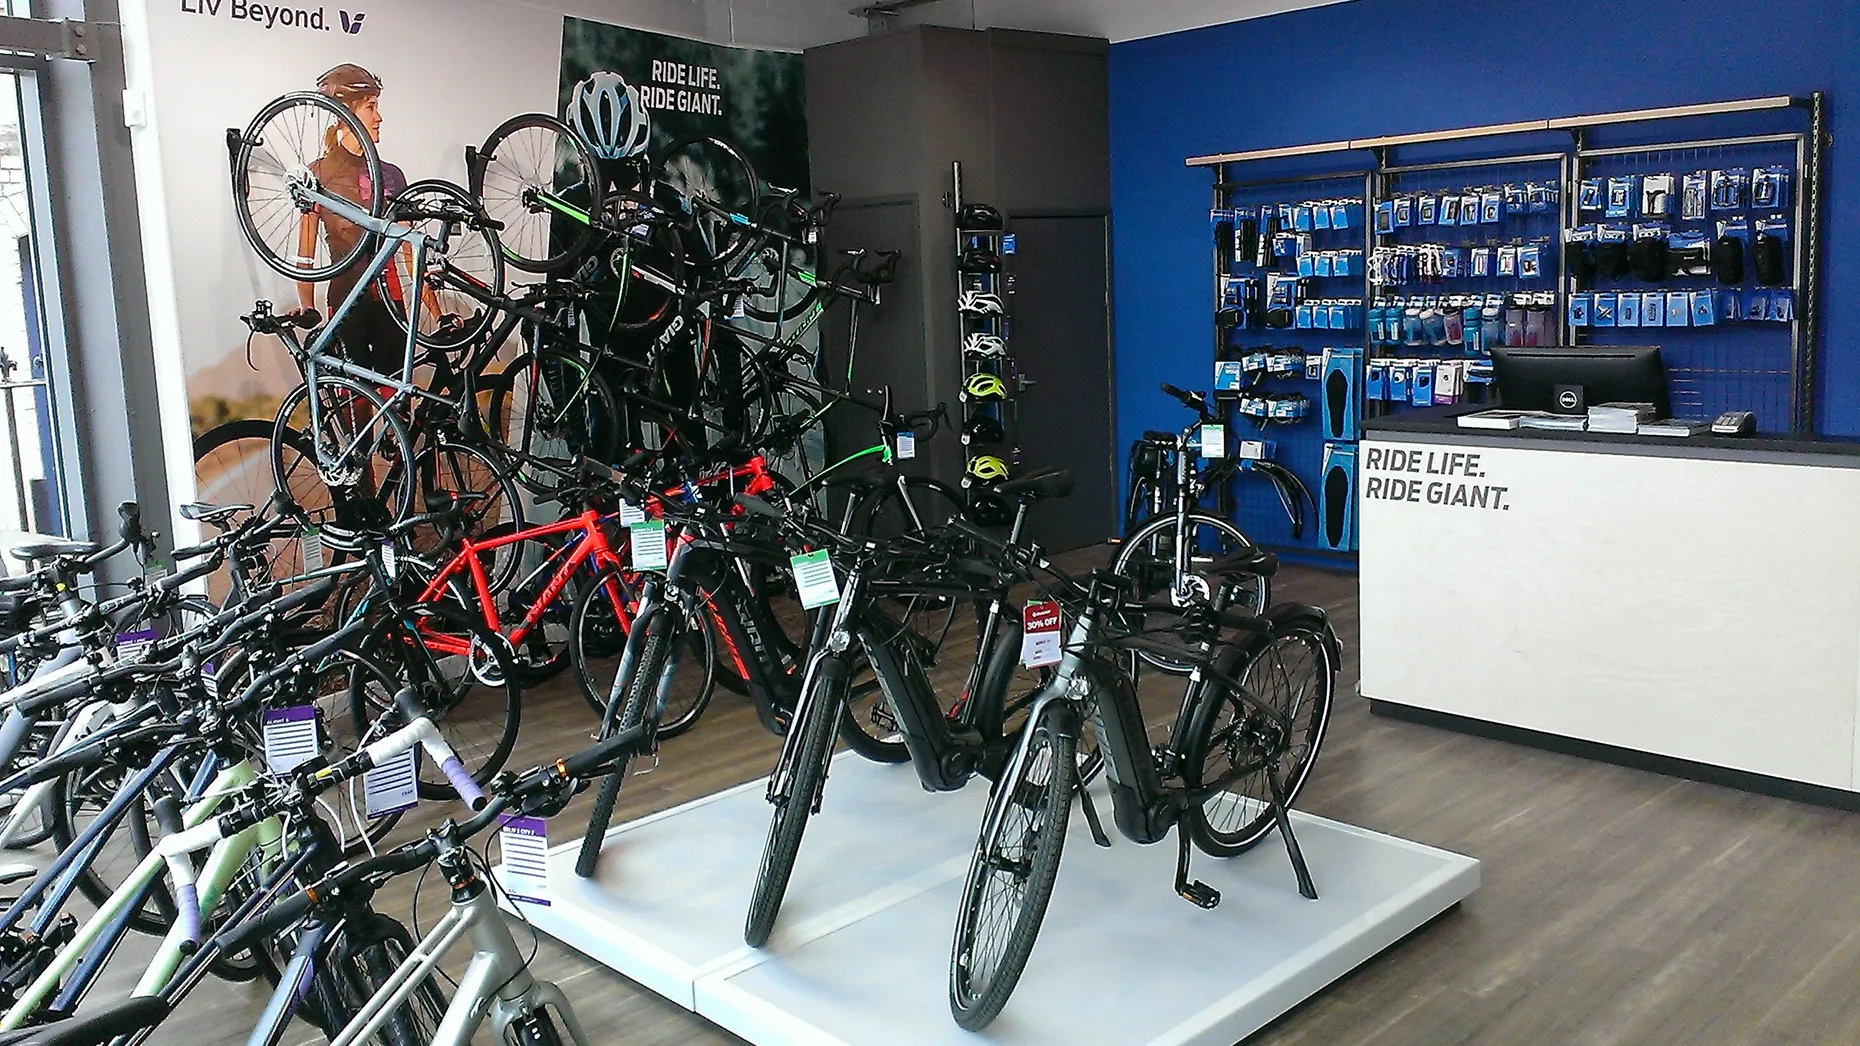

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

## Data Cleaning and Preparation

In [2]:
sales = pd.read_csv(
    'sales_data.csv',
    parse_dates=['Date'])

In [3]:
sales.head(5)

Date  Day     Month  Year  Customer_Age       Age_Group   
0 2013-11-26   26  November  2013            19     Youth (<25)  \
1 2015-11-26   26  November  2015            19     Youth (<25)   
2 2014-03-23   23     March  2014            49  Adults (35-64)   
3 2016-03-23   23     March  2016            49  Adults (35-64)   
4 2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category   
0               M     Canada  British Columbia      Accessories   Bike Racks  \
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit    Cost   
0  Hitch Rack - 4-Bike             8.0       45.0       120.0   590.0   360.0  \
1  Hitch Rack - 4-Bike             8.0       45.0       120.0   590.0   360.0   
2  Hitch Rack - 4-Bike            23.0       45.0       120.0  1366.0  1035.0   
3  Hitch Rack - 4-Bike            20.0       45.0       120.0  1188.0   900.0   
4  Hitch Rack - 4-Bike             4.0       45.0       120.0   238.0   180.0   

   Revenue  
0    950.0  
1    950.0  
2   2401.0  
3   2088.0  
4    418.0

In [25]:
# Get the summary statistics of the numerical columns
print(sales.describe())

                                Date          Day         Year  Customer_Age   
count                           7643  7643.000000  7643.000000   7643.000000  \
mean   2015-01-26 17:32:26.722491136    15.403768  2014.588774     36.141437   
min              2013-07-01 00:00:00     1.000000  2013.000000     17.000000   
25%              2014-02-03 00:00:00     8.000000  2014.000000     28.000000   
50%              2014-07-31 00:00:00    15.000000  2014.000000     35.000000   
75%              2016-02-03 00:00:00    23.000000  2016.000000     43.000000   
max              2016-07-31 00:00:00    31.000000  2016.000000     87.000000   
std                              NaN     8.880167     1.114518     11.007290   

       Order_Quantity    Unit_Cost   Unit_Price       Profit         Cost   
count     7642.000000  7642.000000  7642.000000  7642.000000  7642.000000  \
mean        14.035593     9.193405    24.408794   111.172075    79.916252   
min          1.000000     2.000000     5.000000 

In [26]:
# Check the data types of the columns
print(sales.dtypes)

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity             float64
Unit_Cost                  float64
Unit_Price                 float64
Profit                     float64
Cost                       float64
Revenue                    float64
dtype: object


In [55]:
# Check for missing values
print(sales.isnull().sum())

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      1
Unit_Cost           1
Unit_Price          1
Profit              1
Cost                1
Revenue             1
Calculated_Date     0
dtype: int64


In [103]:
sales.duplicated().sum()

108

## Data Exploration

In [4]:
sales['Customer_Age'].mean()

36.14143660866152

In [14]:
sales['Order_Quantity'].mean()

14.03559277676001

In [6]:
sales['Country'].value_counts()

Country
United States     2498
Canada            1290
Australia         1186
United Kingdom    1067
France             826
Germany            776
Name: count, dtype: int64

In [7]:
sales['Product'].value_counts()

Product
Water Bottle - 30 oz.     4396
Mountain Bottle Cage      1382
Road Bottle Cage           816
Hitch Rack - 4-Bike        596
All-Purpose Bike Stand     452
Water Bottle - 30 o          1
Name: count, dtype: int64

<AxesSubplot:ylabel='Density'>

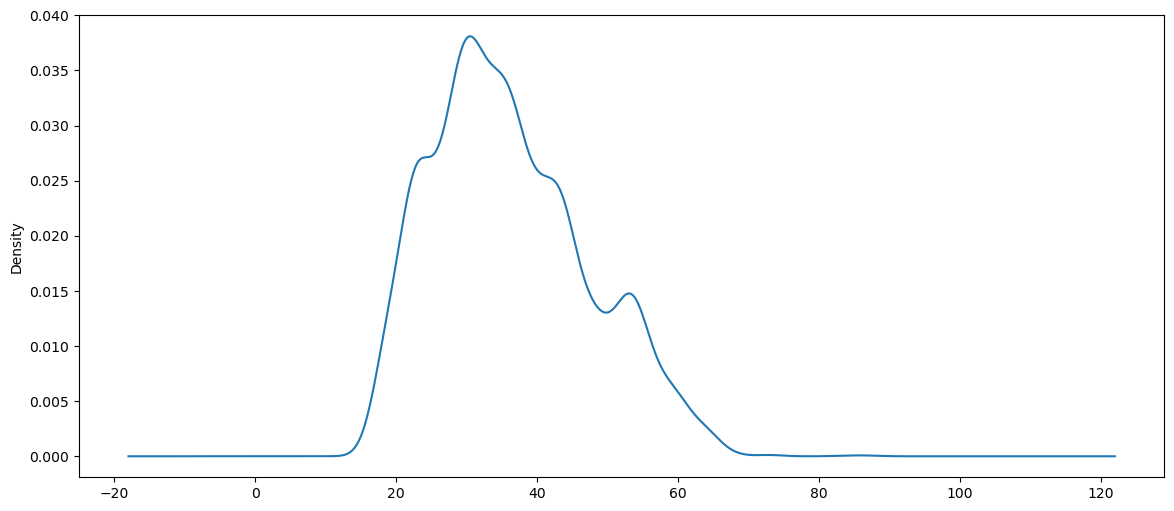

In [13]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

<AxesSubplot:>

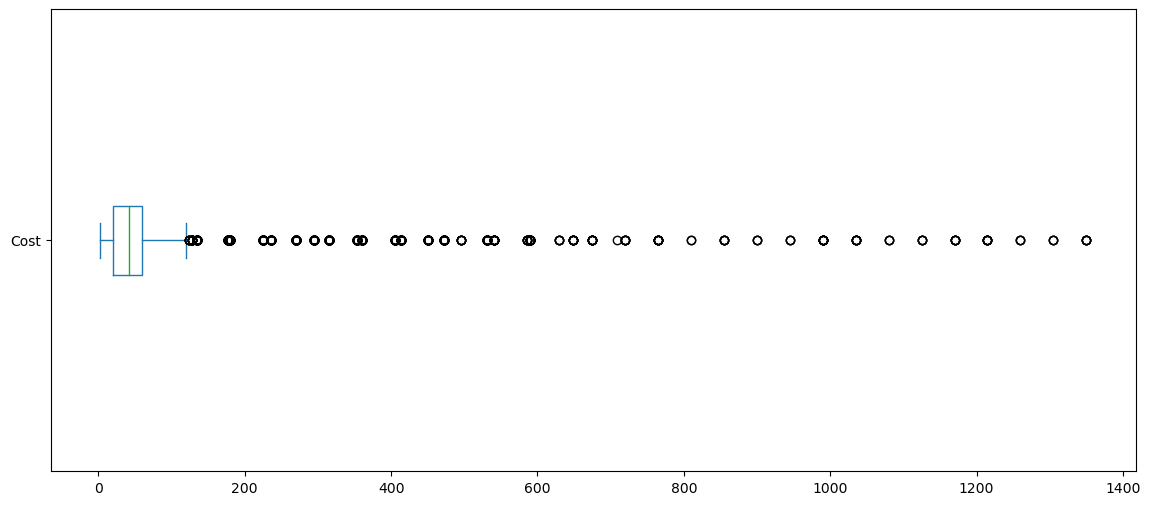

In [12]:
sales['Cost'].plot(kind='box', vert=False, figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

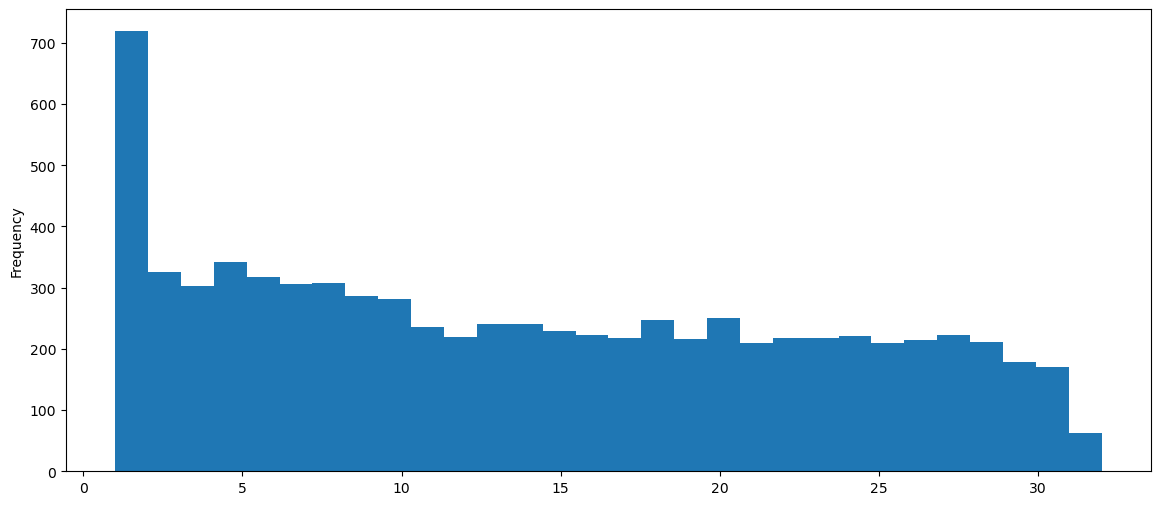

In [15]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

### Sales per year

In [20]:
sales['Year'].value_counts()

Year
2014    2251
2016    2250
2013    1571
2015    1571
Name: count, dtype: int64

<AxesSubplot:ylabel='count'>

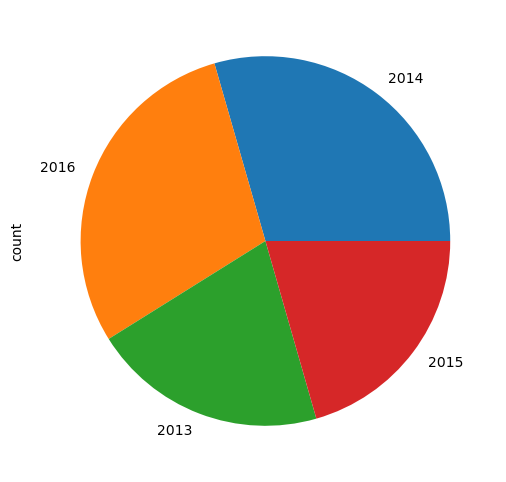

In [21]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6))

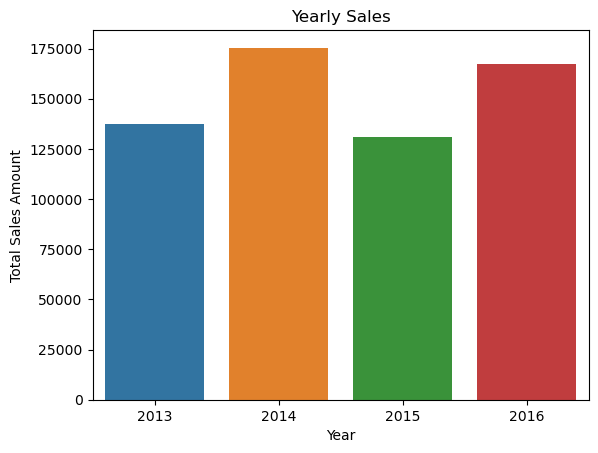

In [36]:
# Create a bar plot of sales by year
monthly_sales = sales.groupby('Year')['Cost'].sum().reset_index()
sns.barplot(x='Year', y='Cost', data=monthly_sales)
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.title('Yearly Sales')
plt.show()

### Months per sale

In [22]:
sales['Month'].value_counts()

Month
June         799
March        778
December     752
May          716
April        686
February     672
January      610
October      578
November     562
September    514
August       508
July         468
Name: count, dtype: int64

<AxesSubplot:xlabel='Month'>

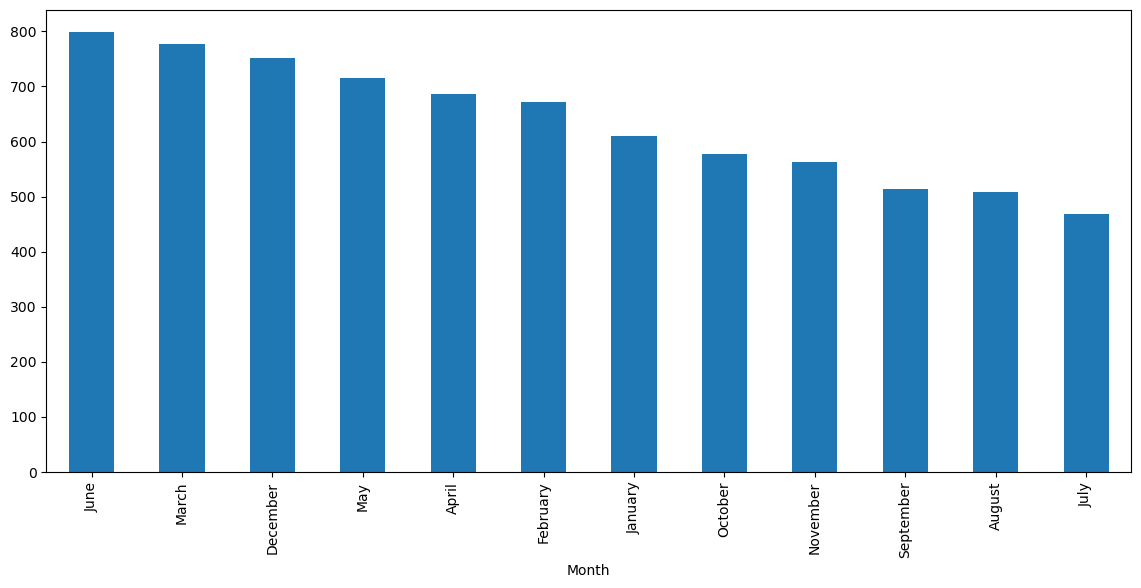

In [23]:
sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

## Country with the most sales

In [42]:
sales['Country'].value_counts()

Country
United States     2498
Canada            1290
Australia         1186
United Kingdom    1067
France             826
Germany            776
Name: count, dtype: int64

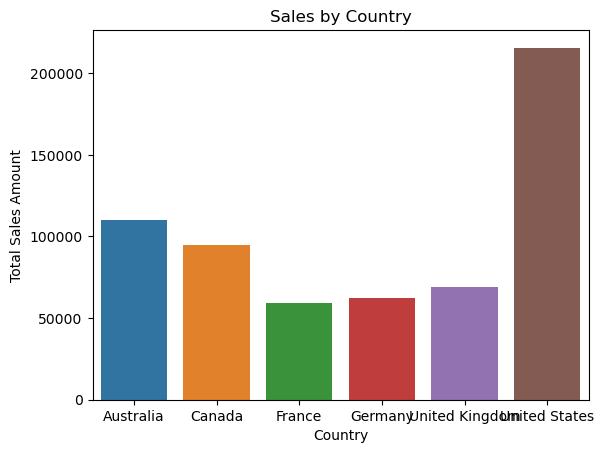

In [43]:
# Create a bar plot of sales by country
monthly_sales = sales.groupby('Country')['Cost'].sum().reset_index()
sns.barplot(x='Country', y='Cost', data=monthly_sales)
plt.xlabel('Country')
plt.ylabel('Total Sales Amount')
plt.title('Sales by Country')
plt.show()

<AxesSubplot:xlabel='Country'>

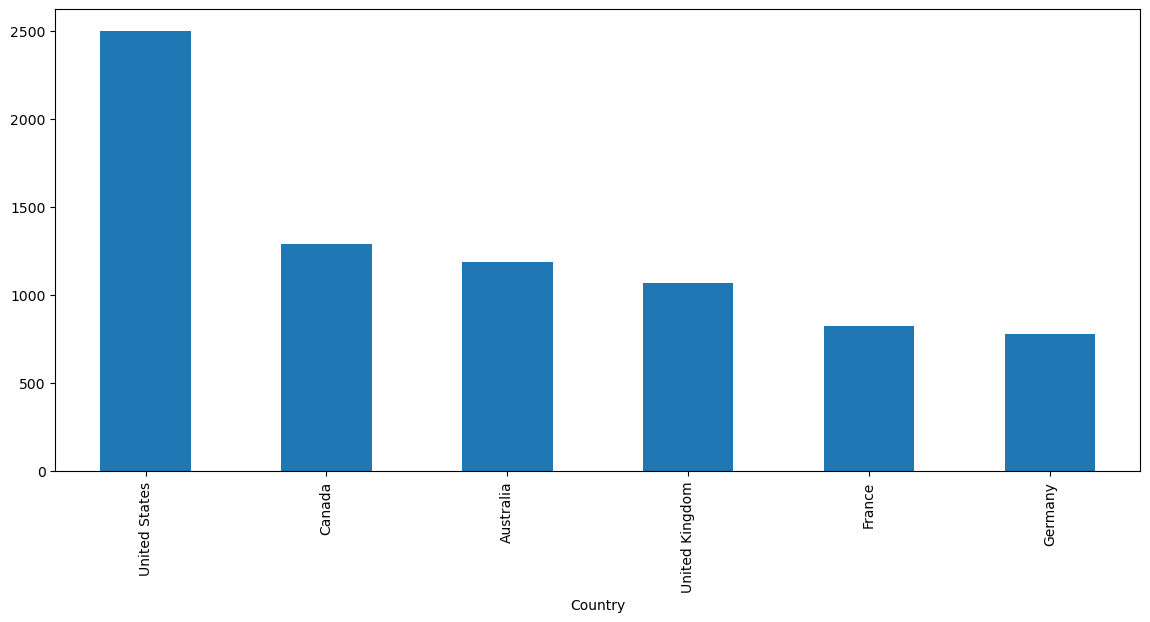

In [44]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

In [ ]:
### EDA on Products sold

In [45]:
sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'Water Bottle - 30 o'], dtype=object)

<AxesSubplot:xlabel='Product'>

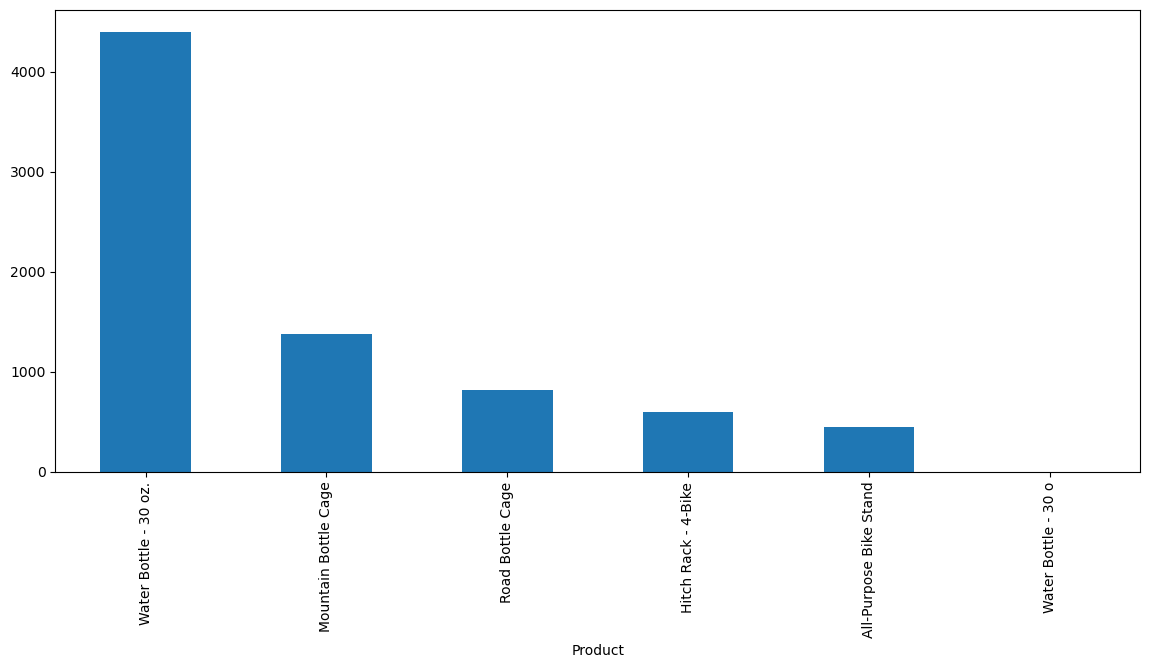

In [46]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

## Relationships with Dataset

<AxesSubplot:xlabel='Unit_Cost', ylabel='Unit_Price'>

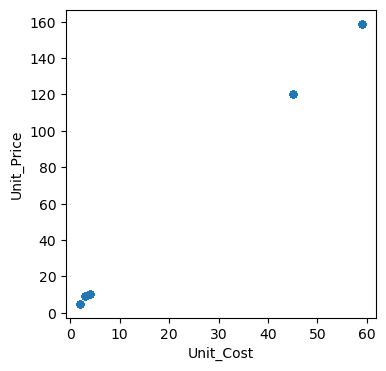

In [48]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(4,4))

<AxesSubplot:xlabel='Order_Quantity', ylabel='Profit'>

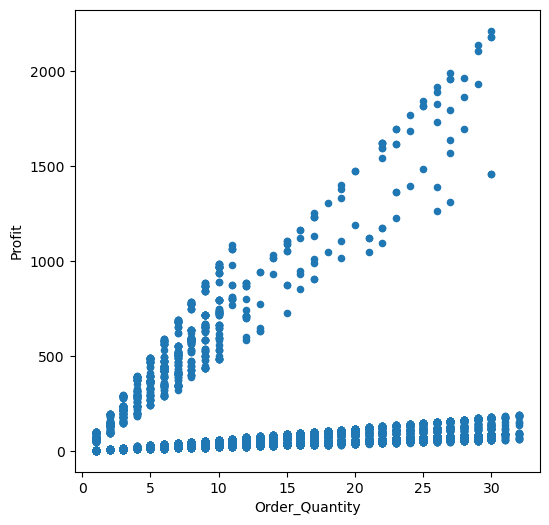

In [49]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

<AxesSubplot:title={'center':'Profit'}, xlabel='[Country]'>

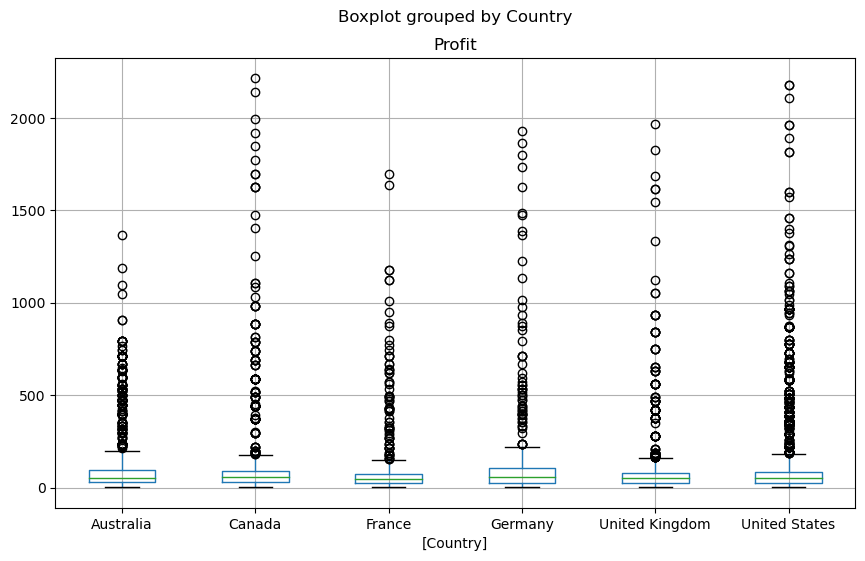

In [50]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

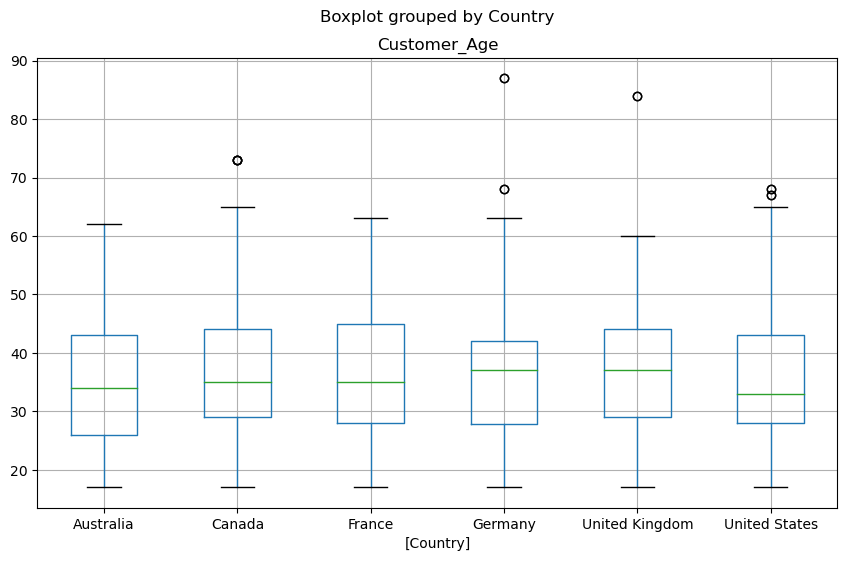

In [51]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

In [52]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)

sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

In [53]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

<AxesSubplot:xlabel='Calculated_Date'>

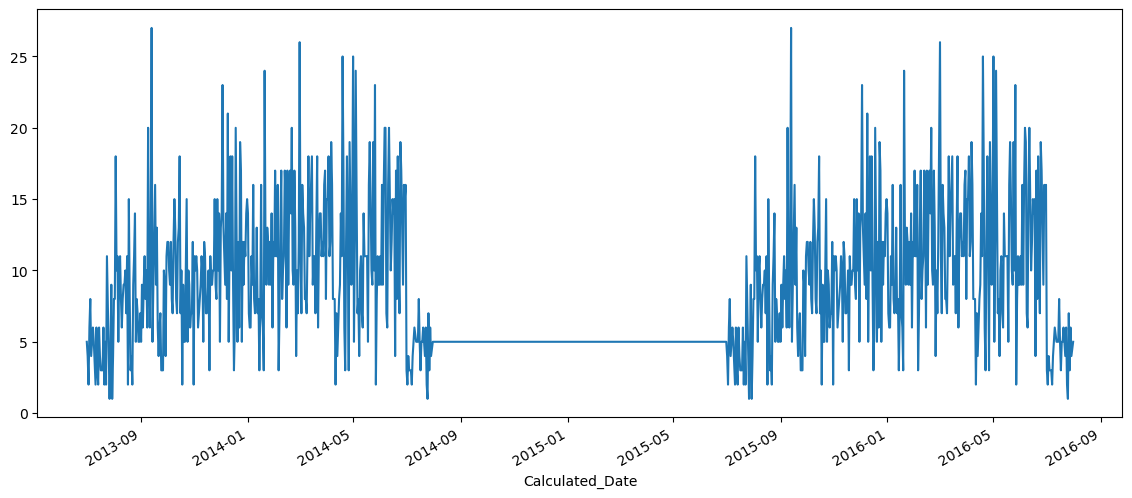

In [54]:
sales['Calculated_Date'].value_counts().plot(kind='line', figsize=(14,6))

In [58]:
# Calculate the average sales by month and region
monthly_region_sales = sales.groupby(['Month', 'Country'])['Cost'].mean().reset_index()

In [60]:
print(monthly_region_sales)

        Month         Country        Cost
0       April       Australia   64.946154
1       April          Canada   57.386792
2       April          France   71.904762
3       April         Germany   77.728571
4       April  United Kingdom  100.157895
..        ...             ...         ...
67  September          Canada   91.684783
68  September          France   54.486111
69  September         Germany  139.586957
70  September  United Kingdom   84.574074
71  September   United States  106.205128

[72 rows x 3 columns]


## Answering Question with the dataset

In [61]:
sales.loc[(sales['Country'] == 'United Kingdom') | (sales['Country'] == 'Australia')].shape[0]

2253

In [62]:
sales.loc[(sales['Country'] == 'United States') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

242

## How many orders were made in each region (state) of United States?

In [68]:
US_states = sales.loc[sales['Country'] == 'United States', 'State'].value_counts()

US_states

State
California        1346
Washington         742
Oregon             386
Texas                6
New York             4
Florida              4
Illinois             4
South Carolina       4
Kentucky             2
Name: count, dtype: int64

<AxesSubplot:xlabel='State'>

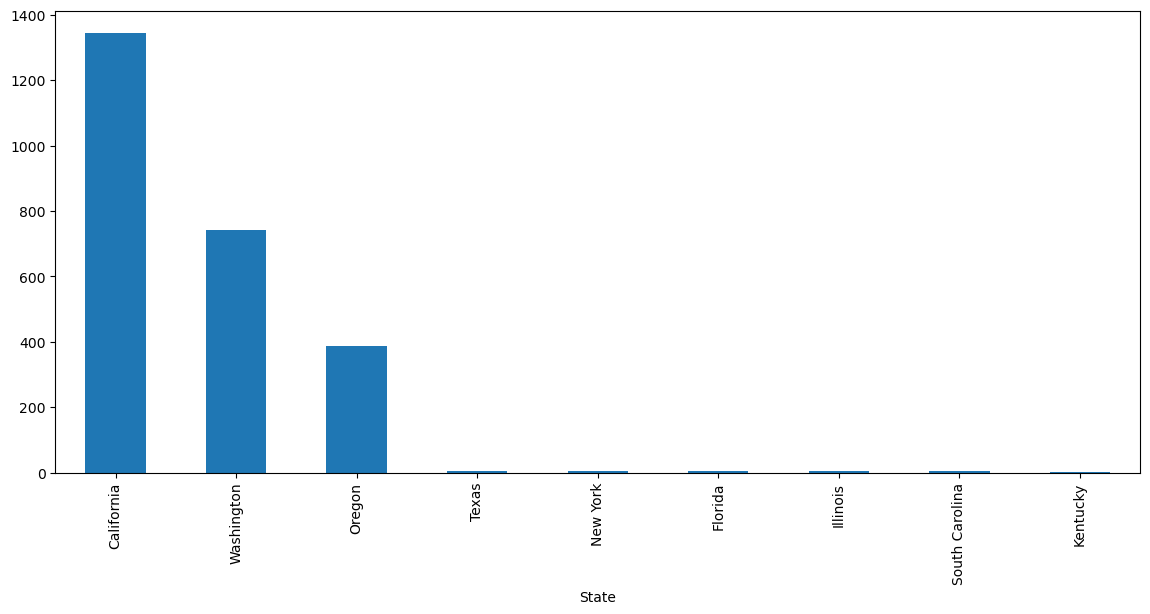

In [69]:
US_states.plot(kind='bar', figsize=(14,6))

### How many sales were made per category

In [72]:
sales['Sub_Category'].value_counts()

Sub_Category
Bottles and Cages    6595
Bike Racks            592
Bike Stands           456
Name: count, dtype: int64

<AxesSubplot:ylabel='count'>

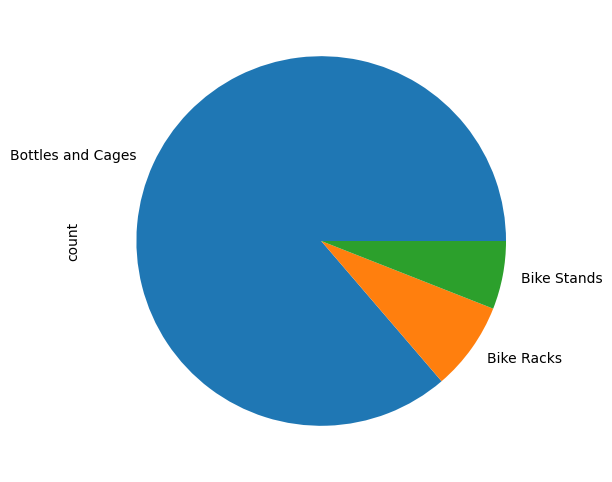

In [73]:
sales['Sub_Category'].value_counts().plot(kind='pie', figsize=(6,6))

### Gender with the most sales

<AxesSubplot:xlabel='Customer_Gender'>

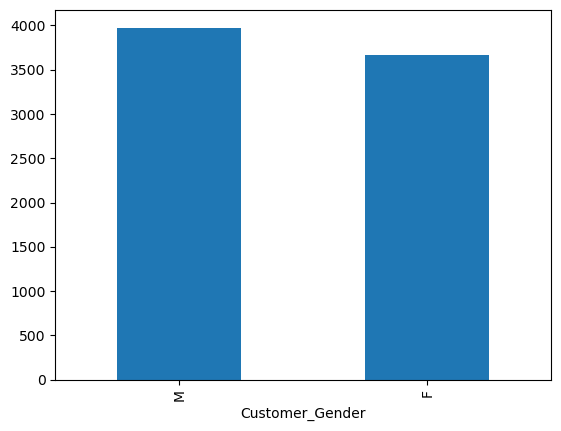

In [75]:
sales['Customer_Gender'].value_counts()
sales['Customer_Gender'].value_counts().plot(kind='bar')

### How many sales with more than 200 in Revenue were made by men?

In [89]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] == 300)].shape[1]

19

In [83]:
sales.sort_values(['Revenue'], ascending=False).head(5)

Date  Day     Month  Year  Customer_Age             Age_Group   
245 2016-01-07    7   January  2016            31  Young Adults (25-34)  \
90  2014-02-12   12  February  2014            46        Adults (35-64)   
182 2014-01-17   17   January  2014            53        Adults (35-64)   
244 2014-01-07    7   January  2014            31  Young Adults (25-34)   
183 2016-01-17   17   January  2016            53        Adults (35-64)   

    Customer_Gender        Country             State Product_Category   
245               M         Canada  British Columbia      Accessories  \
90                M  United States        California      Accessories   
182               F  United States        California      Accessories   
244               M         Canada  British Columbia      Accessories   
183               F  United States        California      Accessories   

    Sub_Category              Product  Order_Quantity  Unit_Cost  Unit_Price   
245   Bike Racks  Hitch Rack - 4-Bike            30.0       45.0       120.0  \
90    Bike Racks  Hitch Rack - 4-Bike            30.0       45.0       120.0   
182   Bike Racks  Hitch Rack - 4-Bike            30.0       45.0       120.0   
244   Bike Racks  Hitch Rack - 4-Bike            29.0       45.0       120.0   
183   Bike Racks  Hitch Rack - 4-Bike            29.0       45.0       120.0   

     Profit    Cost  Revenue Calculated_Date  
245  2214.0  1350.0   3564.0      2016-01-07  
90   2178.0  1350.0   3528.0      2014-02-12  
182  2178.0  1350.0   3528.0      2014-01-17  
244  2140.0  1305.0   3445.0      2014-01-07  
183  2105.0  1305.0   3410.0      2016-01-17

### Sales with the highest revenue

In [90]:
Rev = sales['Revenue'] == sales['Revenue'].max()

sales.loc[Rev]

Date  Day    Month  Year  Customer_Age             Age_Group   
245 2016-01-07    7  January  2016            31  Young Adults (25-34)  \

    Customer_Gender Country             State Product_Category Sub_Category   
245               M  Canada  British Columbia      Accessories   Bike Racks  \

                 Product  Order_Quantity  Unit_Cost  Unit_Price  Profit   
245  Hitch Rack - 4-Bike            30.0       45.0       120.0  2214.0  \

       Cost  Revenue Calculated_Date  
245  1350.0   3564.0      2016-01-07

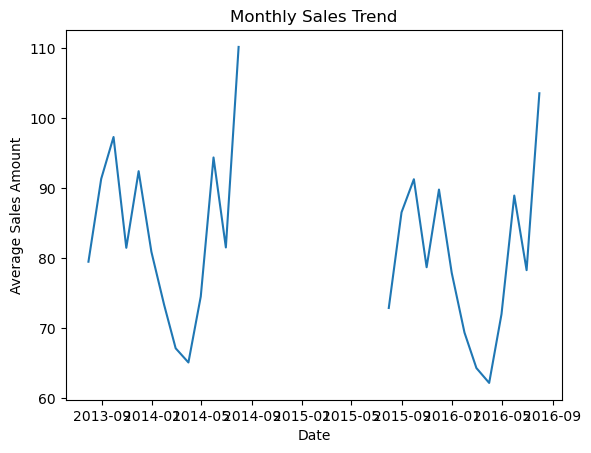

In [93]:
# Convert the 'Date' column to datetime format
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

# Set the 'Date' column as the DataFrame index
sales.set_index('Calculated_Date', inplace=True)

# Resample the data to monthly frequency and calculate the average sales
monthly_sales = sales['Cost'].resample('M').mean()

# Plot the monthly sales trend
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Date')
plt.ylabel('Average Sales Amount')
plt.title('Monthly Sales Trend')
plt.show()


### How many orders were made between May and July of 2016?

In [95]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[cond].shape[0]

877

### Show a grouped box plot per month with the profit values.

<AxesSubplot:title={'center':'Profit'}, xlabel='[Month]'>

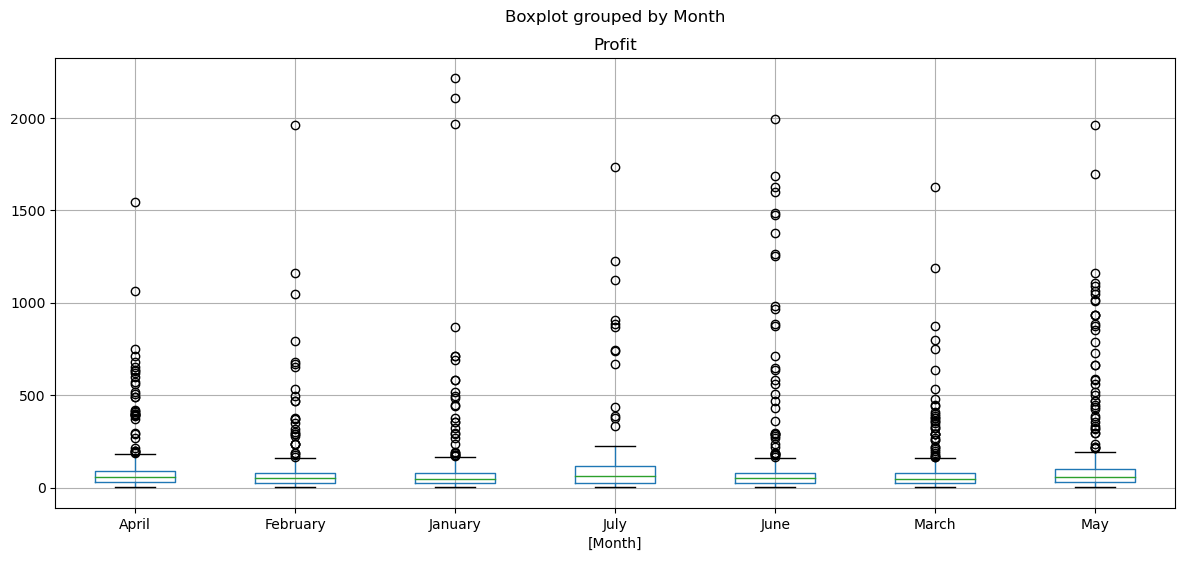

In [98]:
profit_2016 = sales.loc[sales['Year'] == 2016, ['Profit', 'Month']]

profit_2016.boxplot(by='Month', figsize=(14,6))

## Statistical Analysis

In [102]:
# Perform independent t-test
country1 = sales[sales['Country'] == 'United States']['Cost']
country2 = sales[sales['Country'] == 'France']['Cost']

# Calculate the t-statistic and p-value
t_stat, p_value = stats.ttest_ind(country1, country2)

# Set the significance level
alpha = 0.05

# Print the results
print("Independent t-test results:")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Determine the significance
if p_value < alpha:
    print("There is a significant difference in costs between the countries.")
else:
    print("There is no significant difference in costs between the countries.")

Independent t-test results:
t-statistic: 2.530523210121836
p-value: 0.011435064924714975
There is a significant difference in costs between the countries.
